<a href="https://colab.research.google.com/github/artphys/Colab/blob/main/PnP_Geolocation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [553]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow 

In [554]:
import matplotlib.pyplot as plt

In [555]:
points_2D = np.asanyarray(
        [(402.53841229193335493619088083506, 1042.8969270166453497949987649918),
        (739.0592563903950349413207732141,   737.46669248644434446759987622499),
        (1064.4752130131680587510345503688,  436.04453911696316481538815423846),
        (1445.3768396591788132354849949479,  768.95855925639011729799676686525),
        (1853.2714949651433471444761380553,  373.06080557707161915459437295794),
        (1497.8632842757549497036961838603,  20.651820294345468628969790859799)]
        )

In [556]:
def plot_points (points, color='blue'):
  
    if points.shape[1] == 2:
        x, y = zip(*points)
    else:
        x, y, z = zip(*points)
    plt.scatter(x, y, color = color)
    plt.plot   (x, y, color = color)

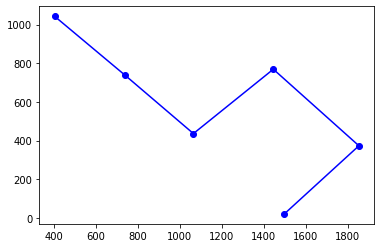

In [557]:
plot_points(points_2D)

In [576]:
from pyproj import CRS
from pyproj import Transformer

ecef = CRS(proj='geocent', ellps='WGS84', datum='WGS84')
lla =  CRS(proj='latlong', ellps='WGS84', datum='WGS84')
ecef2lla = Transformer.from_crs(ecef, lla)
lla2ecef = Transformer.from_crs(lla, ecef)

In [610]:

# FROM AERIAL IMAGERY:  world points must be converted to ECEF  

points_lla = np.asanyarray(
        [(31.59443,34.61249,82.0),
        ( 31.59444,34.61230,82.0),
        ( 31.59444,34.61209,82.0),
        ( 31.59463,34.61209,82.0),
        ( 31.59463,34.61185,82.0),
        ( 31.59444,34.61186,82.0)]
        )

lat_arr, lon_arr, alt_arr = points_lla[:, 0], points_lla[:, 1], points_lla[:, 2]

x, y, z = lla2ecef.transform(lat_arr*np.pi/180, lon_arr*np.pi/180, alt_arr, radians = True)

points_3D = np.array(list(zip(x, y, z)))

In [612]:
fx = 1100.7622070312500
fy = 1102.0703125000000
cx = 494.43371582031250
cy = 311.53576660156250
s = 0

IntrinsicMatrix = np.matrix([(fx, 0, 0), (s, fy, 0), (cx, cy, 1)])

In [613]:
k2 = 0.15480099999999999
k4 = -0.051244999999999999
radialDistortion = np.matrix([k2, k4, 0.0, 0.0])

In [656]:
success, rotation_vector, translation_vector = cv2.solvePnP(points_3D, points_2D, IntrinsicMatrix, radialDistortion, flags=0)
#rotation_vector, translation_vector = cv2.solvePnPRefineLM(points_3D, points_2D, IntrinsicMatrix, radialDistortion, rotation_vector, translation_vector)


In [657]:
print ('SUCCESS : ', success, '\n\n', 'ROTATION : \n', rotation_vector, '\n\n', 'TRANSLATION : \n',translation_vector)

SUCCESS :  True 

 ROTATION : 
 [[-0.22298361]
 [-0.87435286]
 [-1.24537756]] 

 TRANSLATION : 
 [[-1047846.76319531]
 [  188658.19886222]
 [-6281704.70657819]]


In [658]:
np_rodrigues = np.asarray(rotation_vector[:,:],np.float64)
rmat = cv2.Rodrigues(np_rodrigues)[0]
camera_position = np.array( -np.matrix(rmat).T @ np.matrix(translation_vector))

In [659]:
print (camera_position)

[[4476115.49175787]
 [2753071.57281512]
 [3602551.28973701]]


In [660]:

c_lat, c_lon, c_alt = ecef2lla.transform (camera_position[0], camera_position[1], camera_position[2], radians=True)
camera_position_lla = np.array([[c_lat*180/np.pi, c_lon*180/np.pi, c_alt]])

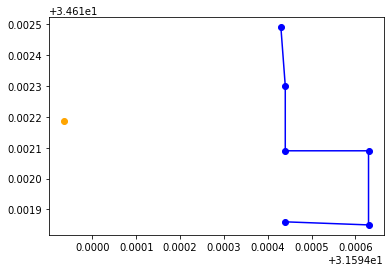

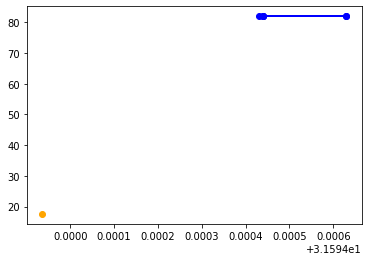

In [666]:
plot_points(points_lla)
plot_points(camera_position_lla, color = 'orange')
plt.show()
plot_points(points_lla[:, [0, 2, 1]])
plot_points(camera_position_lla[:, [0, 2, 1]], color = 'orange')

In [663]:
projected_points, _ = cv2.projectPoints(points_3D, rotation_vector, translation_vector, IntrinsicMatrix, radialDistortion)
projected_points    = projected_points[:, 0]

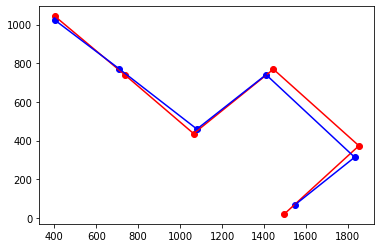

In [664]:
plot_points(points_2D, color = 'red')
plot_points(projected_points, color = 'blue')

In [665]:
a = np.array([[1, 2, 3], [1, 2, 3]])
b = [0, 2, 1]
print (a[:,b])

[[1 3 2]
 [1 3 2]]
